In [7]:
import pandas as pd
df = pd.read_csv("crime_data_clean_azra.csv")

In [8]:
df.describe(include='all')

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
count,9.952310e+05,995231,995231,995231.000000,995231.000000,995231,995231.000000,995231.000000,995231.000000,995231,...,995215.000000,995231,995231.000000,995231,995230,995231,995220.000000,995231,995231.000000,995231.000000
unique,NaN,1893,1879,NaN,NaN,21,NaN,NaN,NaN,140,...,NaN,307,NaN,80,6,6,NaN,66429,NaN,NaN
top,NaN,2023-02-03,2022-12-02,NaN,NaN,Central,NaN,NaN,NaN,VEHICLE - STOLEN,...,NaN,STREET,NaN,UNKNOWN,IC,Invest Cont,NaN,800 N ALAMEDA ST,NaN,NaN
freq,NaN,923,1130,NaN,NaN,69145,NaN,NaN,NaN,114892,...,NaN,260322,NaN,670471,794419,794419,NaN,2581,NaN,NaN
mean,2.201856e+08,NaN,NaN,1341.445986,10.686460,NaN,1115.106861,1.397080,499.828341,NaN,...,304.474862,NaN,118.000155,NaN,NaN,NaN,499.588692,NaN,34.074036,-118.354557
std,1.319636e+07,NaN,NaN,651.384447,6.110729,NaN,611.204927,0.489293,205.009861,NaN,...,219.292725,NaN,185.080293,NaN,NaN,NaN,204.809678,NaN,0.111123,0.104401
min,8.170000e+02,NaN,NaN,1.000000,1.000000,NaN,101.000000,1.000000,110.000000,NaN,...,101.000000,NaN,-1.000000,NaN,NaN,NaN,110.000000,NaN,33.705900,-118.667600
25%,2.106155e+08,NaN,NaN,900.000000,5.000000,NaN,585.000000,1.000000,331.000000,NaN,...,101.000000,NaN,-1.000000,NaN,NaN,NaN,331.000000,NaN,34.015300,-118.430700
50%,2.209145e+08,NaN,NaN,1423.000000,11.000000,NaN,1139.000000,1.000000,442.000000,NaN,...,203.000000,NaN,-1.000000,NaN,NaN,NaN,442.000000,NaN,34.059100,-118.322800
75%,2.311089e+08,NaN,NaN,1900.000000,16.000000,NaN,1613.000000,2.000000,626.000000,NaN,...,501.000000,NaN,307.000000,NaN,NaN,NaN,626.000000,NaN,34.164900,-118.274000


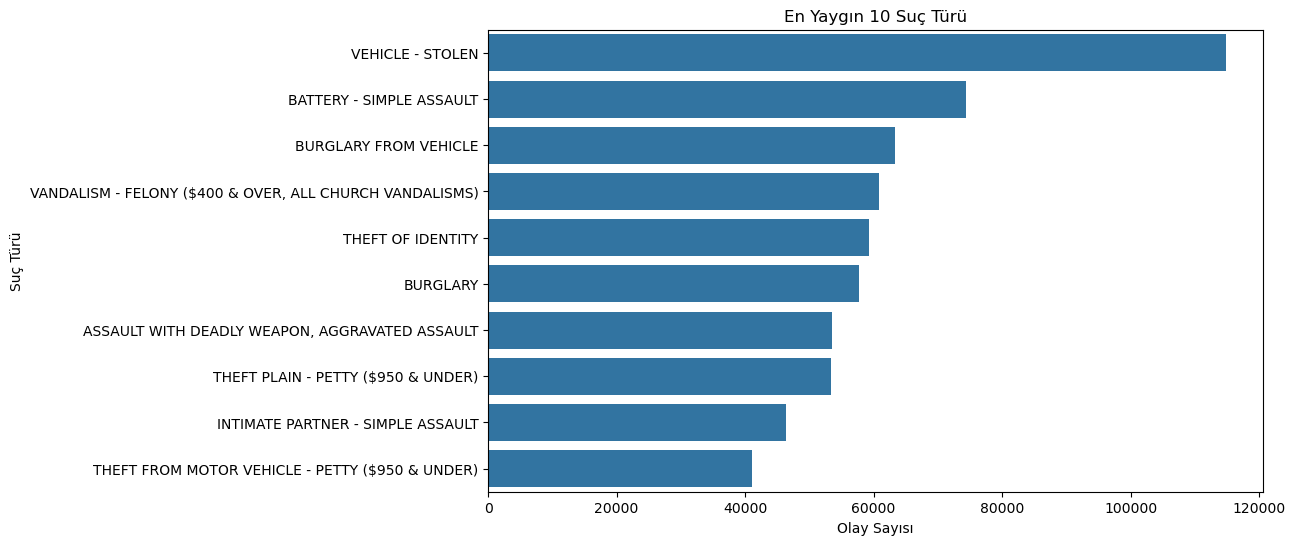

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
top_crimes = df['Crm Cd Desc'].value_counts().head(10)
sns.barplot(x=top_crimes.values, y=top_crimes.index)
plt.title("En Yaygın 10 Suç Türü")
plt.xlabel("Olay Sayısı")
plt.ylabel("Suç Türü")
plt.show()

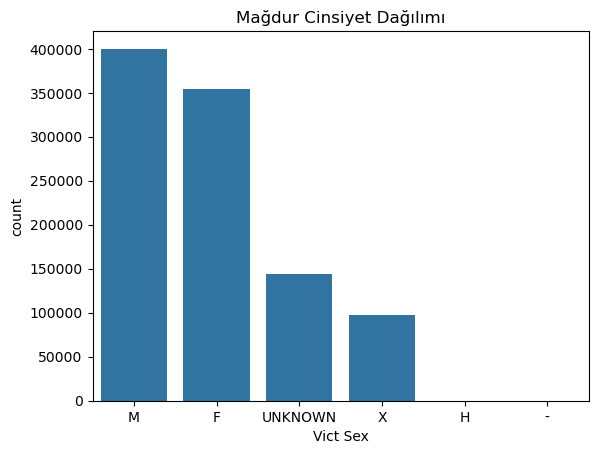

In [10]:
sns.countplot(x='Vict Sex', data=df)
plt.title("Mağdur Cinsiyet Dağılımı")
plt.show()

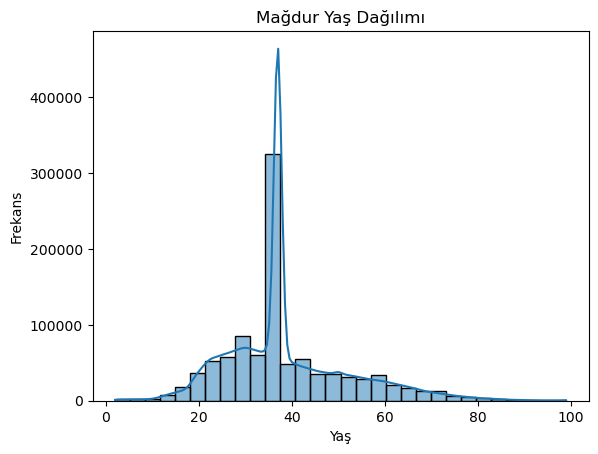

In [11]:
sns.histplot(df['Vict Age'], bins=30, kde=True)
plt.title("Mağdur Yaş Dağılımı")
plt.xlabel("Yaş")
plt.ylabel("Frekans")
plt.show()

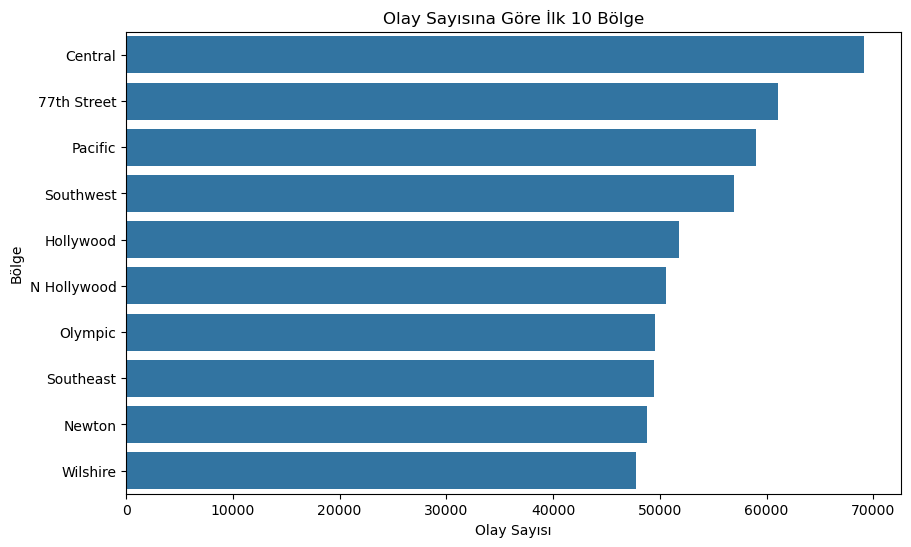

In [12]:
plt.figure(figsize=(10,6))
area_counts = df['AREA NAME'].value_counts().head(10)
sns.barplot(x=area_counts.values, y=area_counts.index)
plt.title("Olay Sayısına Göre İlk 10 Bölge")
plt.xlabel("Olay Sayısı")
plt.ylabel("Bölge")
plt.show()

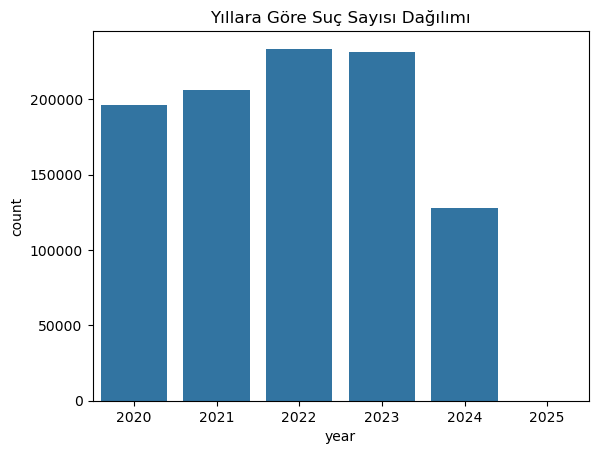

In [13]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')
df['year'] = df['DATE OCC'].dt.year
sns.countplot(x='year', data=df)
plt.title("Yıllara Göre Suç Sayısı Dağılımı")
plt.show()

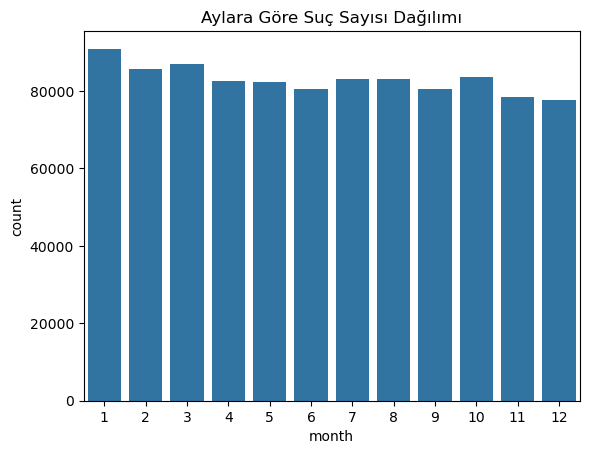

In [14]:
df['month'] = df['DATE OCC'].dt.month
sns.countplot(x='month', data=df)
plt.title("Aylara Göre Suç Sayısı Dağılımı")
plt.show()

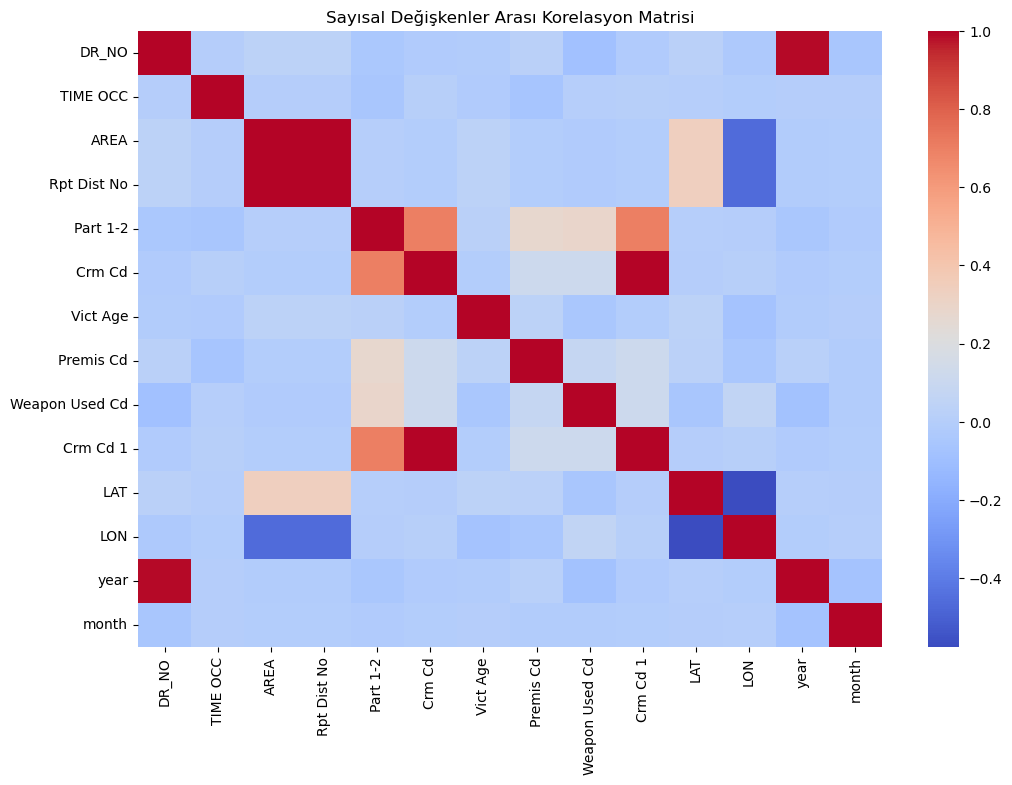

In [15]:
# Sadece sayısal sütunlar için korelasyon matrisi
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Sayısal Değişkenler Arası Korelasyon Matrisi")
plt.show()

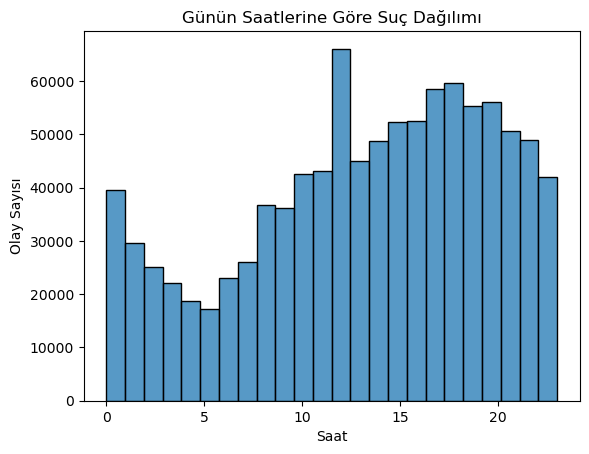

In [16]:
# Saat bazında suç dağılımı
df['hour'] = df['TIME OCC'] // 100
sns.histplot(df['hour'], bins=24)
plt.title("Günün Saatlerine Göre Suç Dağılımı")
plt.xlabel("Saat")
plt.ylabel("Olay Sayısı")
plt.show()

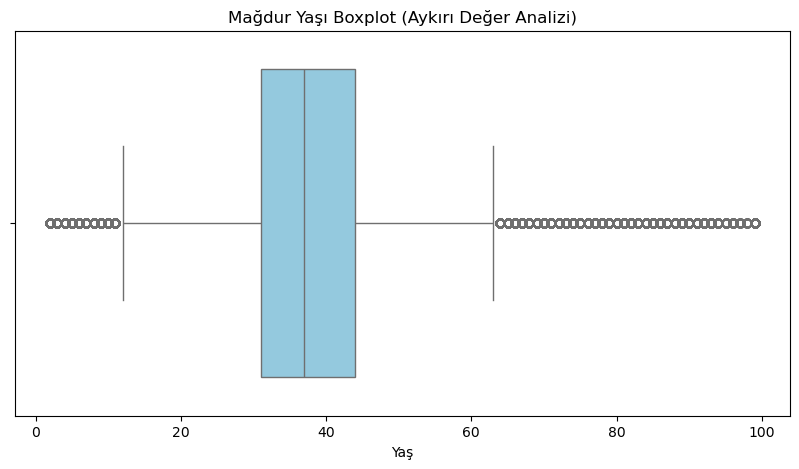

In [17]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Vict Age'], color='skyblue')
plt.title("Mağdur Yaşı Boxplot (Aykırı Değer Analizi)")
plt.xlabel("Yaş")
plt.show()

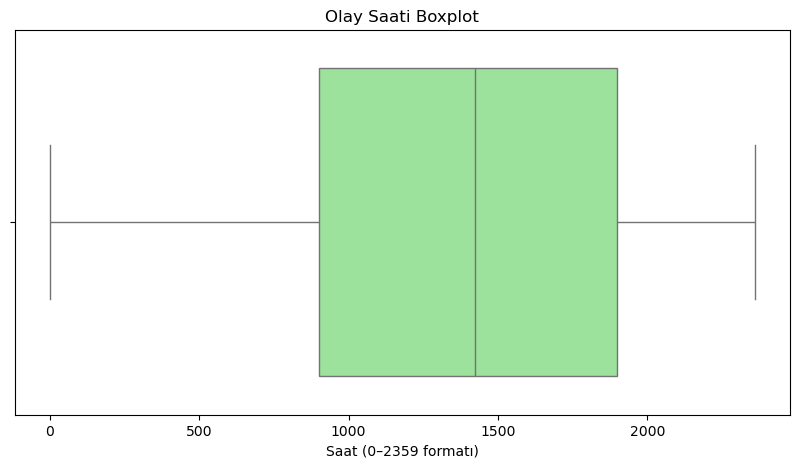

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['TIME OCC'], color='lightgreen')
plt.title("Olay Saati Boxplot")
plt.xlabel("Saat (0–2359 formatı)")
plt.show()


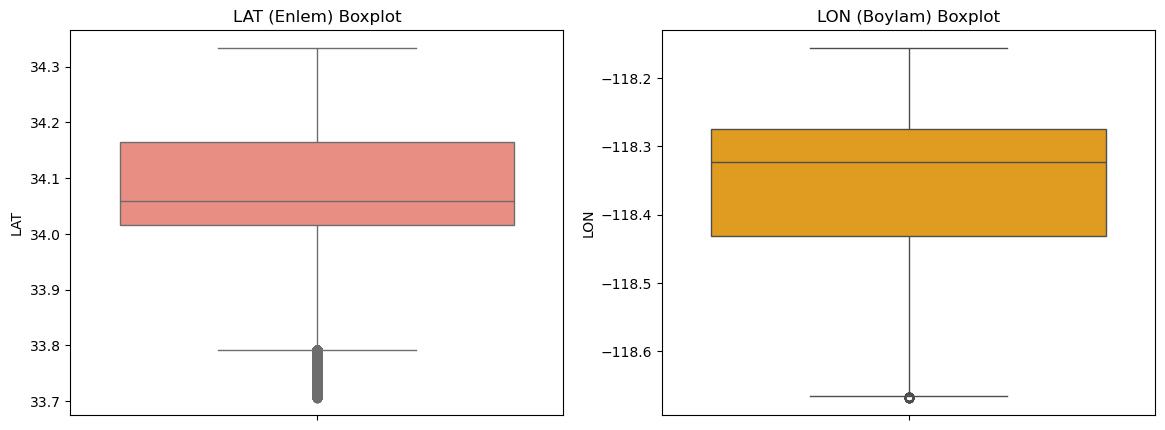

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(ax=axes[0], y=df['LAT'], color='salmon')
axes[0].set_title("LAT (Enlem) Boxplot")

sns.boxplot(ax=axes[1], y=df['LON'], color='orange')
axes[1].set_title("LON (Boylam) Boxplot")

plt.show()


In [20]:
sample_df = df.sample(10000, random_state=42)

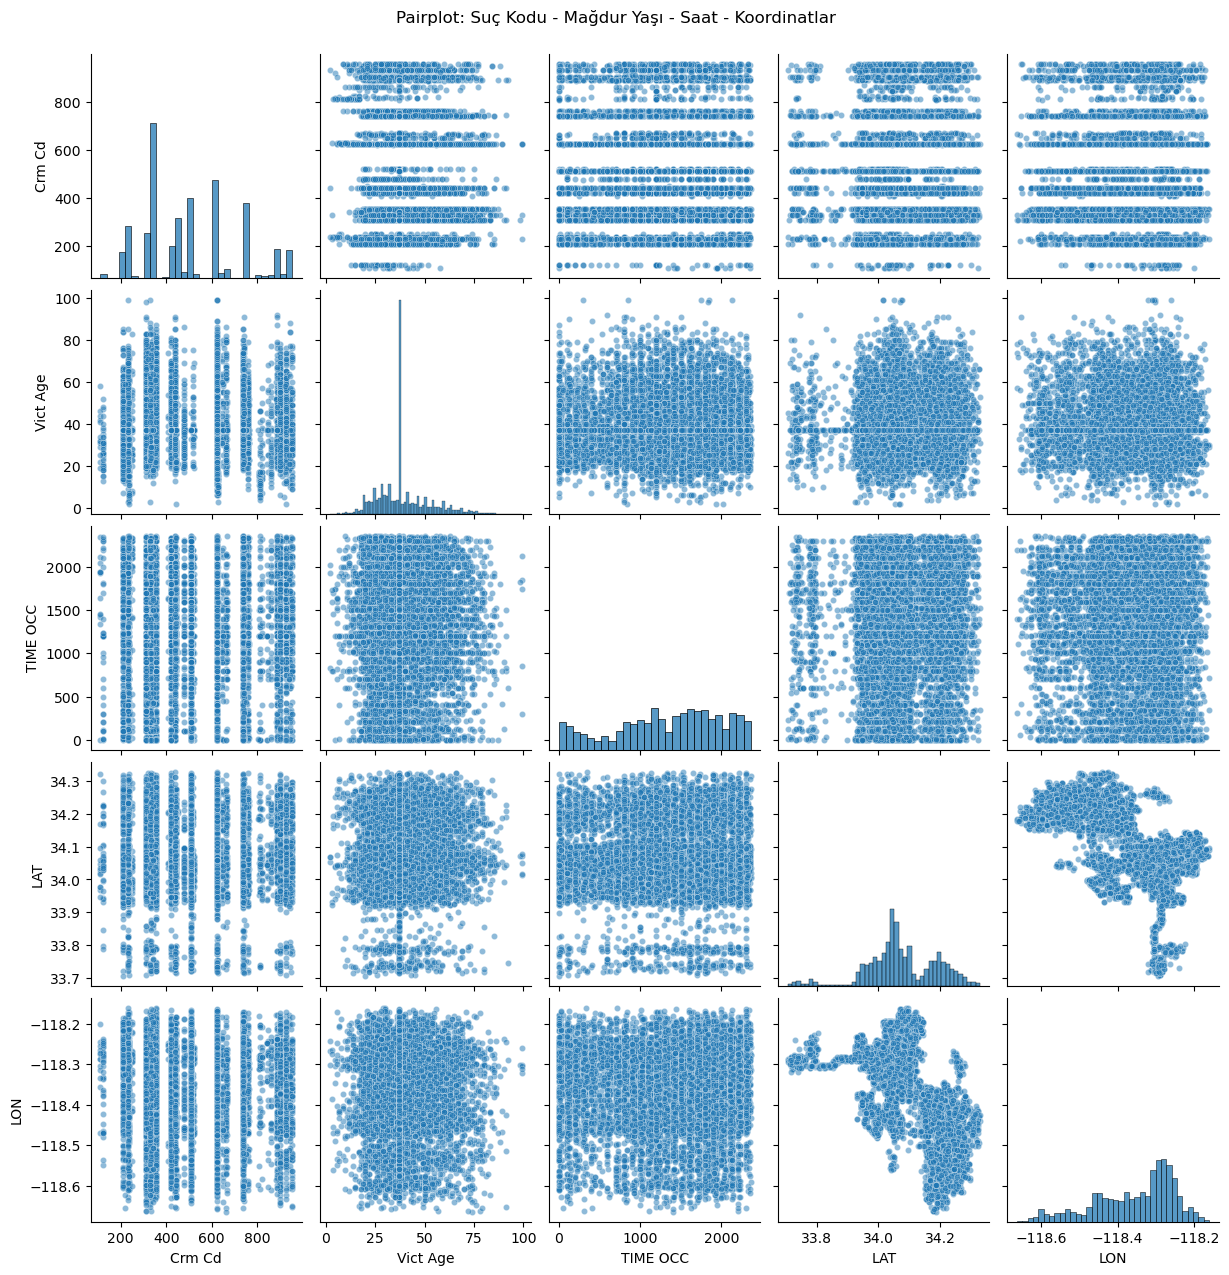

In [21]:
sns.pairplot(
    sample_df[['Crm Cd', 'Vict Age', 'TIME OCC', 'LAT', 'LON']],
    diag_kind='hist',
    plot_kws={'alpha': 0.5, 's': 20}
)
plt.suptitle("Pairplot: Suç Kodu - Mağdur Yaşı - Saat - Koordinatlar", y=1.02)
plt.show()


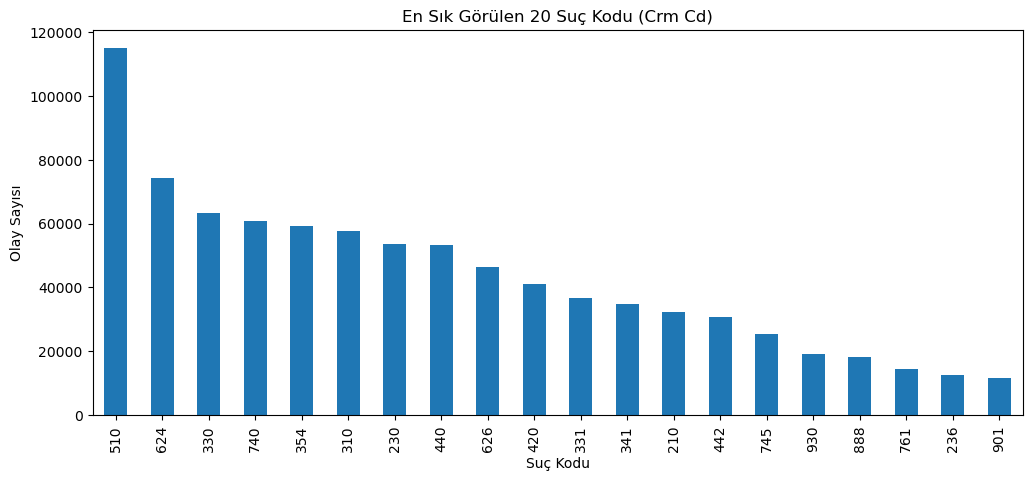

In [22]:
plt.figure(figsize=(12,5))
df['Crm Cd'].value_counts().head(20).plot(kind='bar')
plt.title("En Sık Görülen 20 Suç Kodu (Crm Cd)")
plt.xlabel("Suç Kodu")
plt.ylabel("Olay Sayısı")
plt.show()

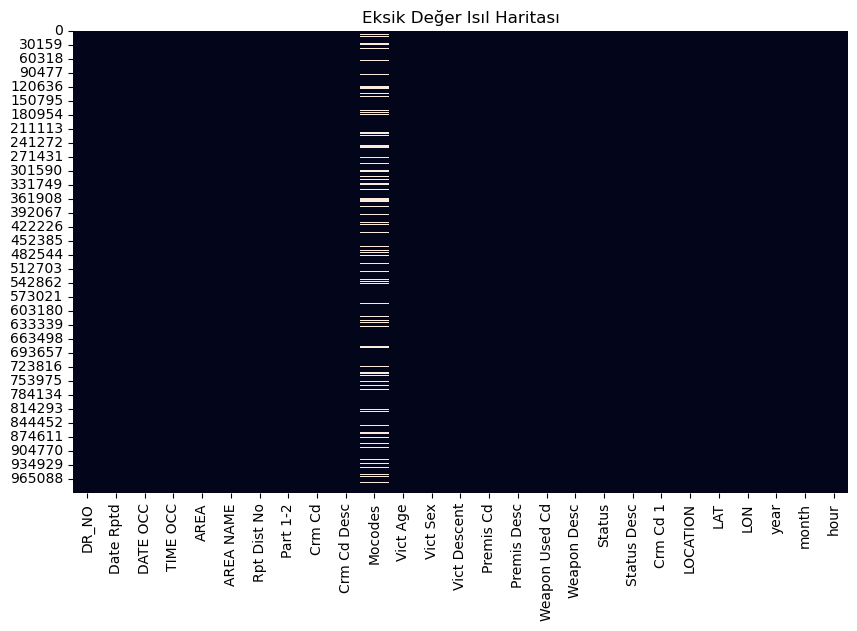

In [23]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False)
plt.title("Eksik Değer Isıl Haritası")
plt.show()
